In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
file_path = 'D:\Hiwi-TimeSeries\dataset\Versuch1_final.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',')

## Functions

In [6]:
def rename_columns(dataframe):
    renamed_columns = []
    for column in dataframe.columns:
        parts = column.split('_')
        if len(parts) >= 3:
            if parts[0] == 'Geschw':
                new_column = 'Speed_' + parts[1]
            elif parts[0] == 'Beschl':
                new_column = 'Accel_' + parts[1]
            elif parts[0] == 'Kraft':
                new_column = 'Power_' + parts[1]
            elif parts[0] == 'Current':
                new_column = 'Current_' + parts[1]
        else:
            new_column = column
        renamed_columns.append(new_column)
    
    dataframe.columns = renamed_columns
    return dataframe

In [4]:
def plot_prediction(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Actual Current')
    plt.ylabel('Predicted Current')
    plt.title('Actual vs. Predicted Current')
    plt.show()

In [16]:
def residual_analysis(y_test, y_pred):
    residuals = y_test - y_pred
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs. Predicted Values
    axs[0, 0].scatter(y_pred, residuals)
    axs[0, 0].set_xlabel('Predicted Values')
    axs[0, 0].set_ylabel('Residuals')
    axs[0, 0].set_title('Residuals vs. Predicted Values')
    axs[0, 0].axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0

    # Histogram of Residuals
    axs[0, 1].hist(residuals, bins=30)
    axs[0, 1].set_xlabel('Residuals')
    axs[0, 1].set_ylabel('Frequency')
    axs[0, 1].set_title('Histogram of Residuals')

    # Residuals vs. Fitted Values
    axs[1, 0].scatter(y_pred, residuals)
    axs[1, 0].set_xlabel('Fitted Values')
    axs[1, 0].set_ylabel('Residuals')
    axs[1, 0].set_title('Residuals vs. Fitted Values')
    axs[1, 0].axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0

    # Residuals vs. Predictor Variables (for each feature)
    for i in range(X_test.shape[1]):
        axs[1, 1].scatter(X_test[:, i], residuals)
        axs[1, 1].set_xlabel('Feature {}'.format(i+1))
        axs[1, 1].set_ylabel('Residuals')
        axs[1, 1].set_title('Residuals vs. Feature {}'.format(i+1))
        axs[1, 1].axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0

    plt.tight_layout()
    plt.show()

In [23]:
def fit_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)

    plot_prediction(y_test, y_pred)
    #residual_analysis(y_test, y_pred)

## Pre-processing and Data Split

In [7]:
df.drop('removed_material_0', axis=1, inplace=True)
df = rename_columns(df)

In [6]:
X = df[['Speed_X', 'Accel_X']]
y = df['Current_X']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Scaling (Optional)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Models

## 1. LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1346925, number of used features: 2
[LightGBM] [Info] Start training from score 0.499317
Mean Absolute Error: 0.06195912410361979
Mean Squared Error: 0.03665196314655283
R-squared Score: 0.45668261309075586


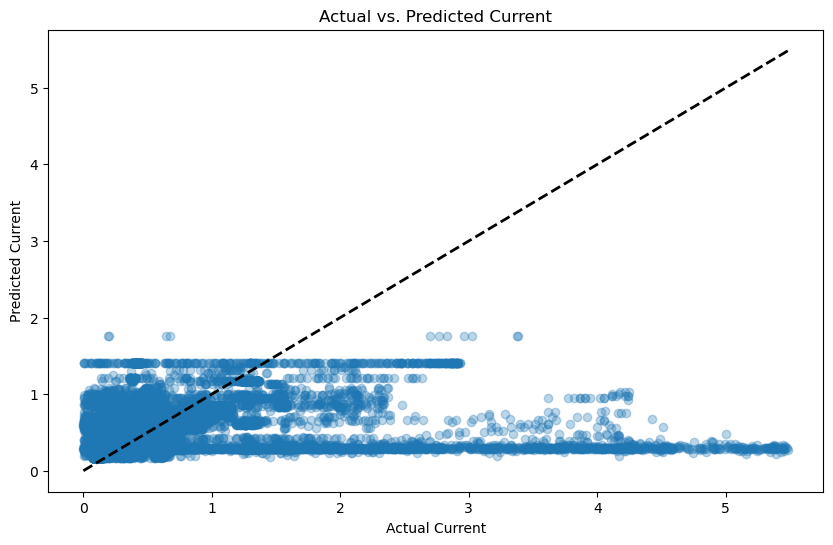

InvalidIndexError: (slice(None, None, None), 0)

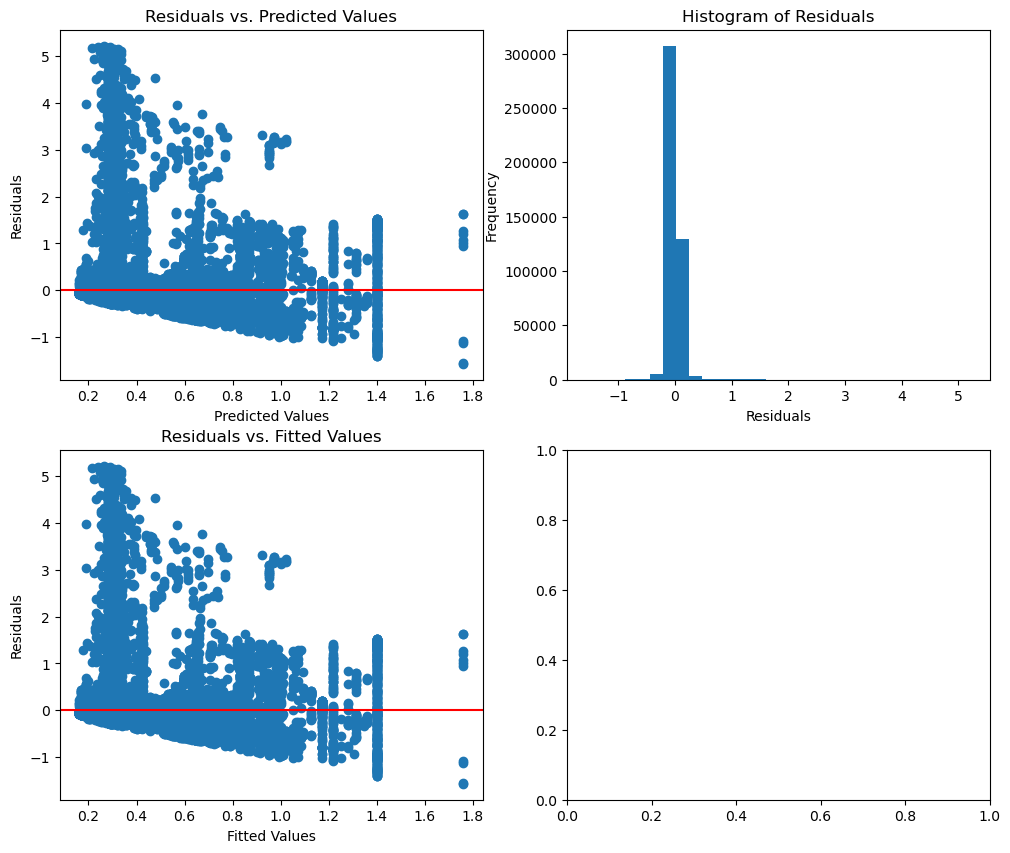

In [21]:
model = LGBMRegressor()
fit_predict(model, X_train, X_test, y_train, y_test)

## 2. CatBoost

Learning rate set to 0.127825
0:	learn: 0.2455262	total: 258ms	remaining: 4m 17s
1:	learn: 0.2345650	total: 350ms	remaining: 2m 54s
2:	learn: 0.2257758	total: 427ms	remaining: 2m 22s
3:	learn: 0.2188064	total: 499ms	remaining: 2m 4s
4:	learn: 0.2133322	total: 563ms	remaining: 1m 52s
5:	learn: 0.2090319	total: 630ms	remaining: 1m 44s
6:	learn: 0.2056662	total: 707ms	remaining: 1m 40s
7:	learn: 0.2030542	total: 786ms	remaining: 1m 37s
8:	learn: 0.2010520	total: 860ms	remaining: 1m 34s
9:	learn: 0.1994619	total: 935ms	remaining: 1m 32s
10:	learn: 0.1982253	total: 1.01s	remaining: 1m 30s
11:	learn: 0.1972587	total: 1.08s	remaining: 1m 29s
12:	learn: 0.1964895	total: 1.16s	remaining: 1m 27s
13:	learn: 0.1958837	total: 1.23s	remaining: 1m 26s
14:	learn: 0.1954169	total: 1.31s	remaining: 1m 26s
15:	learn: 0.1950499	total: 1.38s	remaining: 1m 24s
16:	learn: 0.1947514	total: 1.45s	remaining: 1m 23s
17:	learn: 0.1945155	total: 1.51s	remaining: 1m 22s
18:	learn: 0.1943189	total: 1.57s	remaining: 

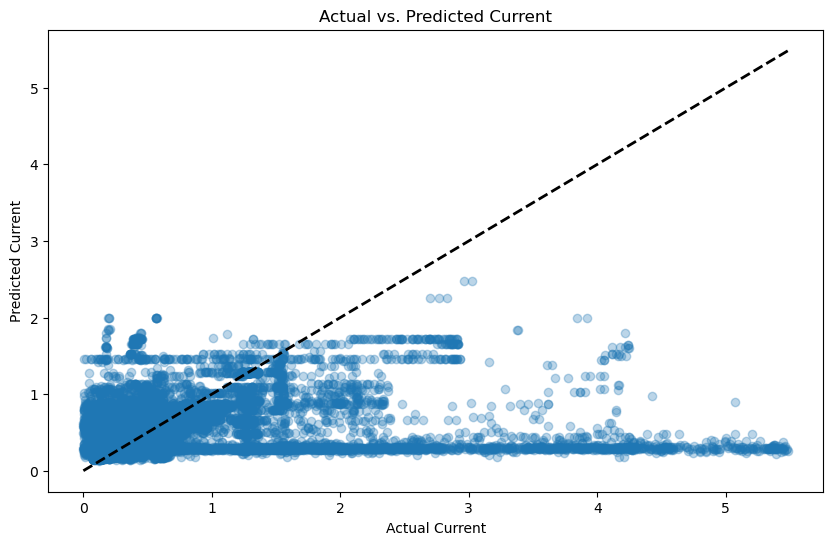

InvalidIndexError: (slice(None, None, None), 0)

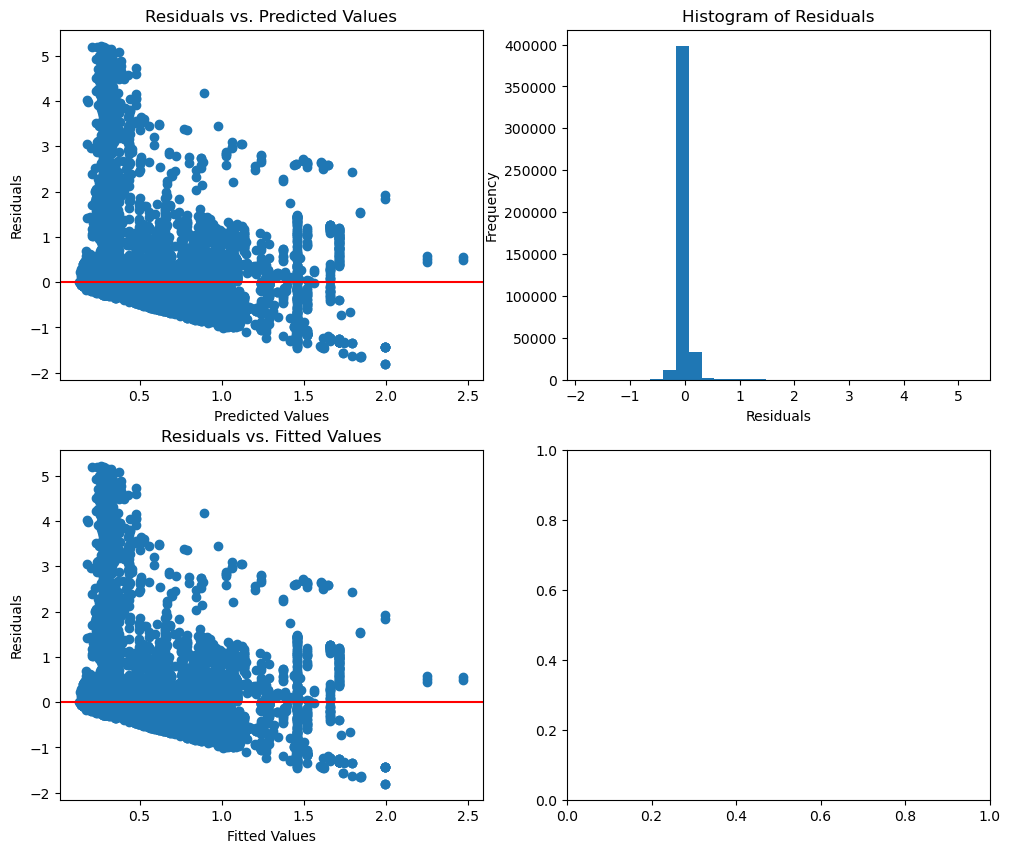

In [22]:
model = CatBoostRegressor()
fit_predict(model, X_train, X_test, y_train, y_test)

## 3. Linear Regression

Mean Absolute Error: 0.1847882365661663
Mean Squared Error: 0.0674447875941757
R-squared Score: 0.00021928948810057136


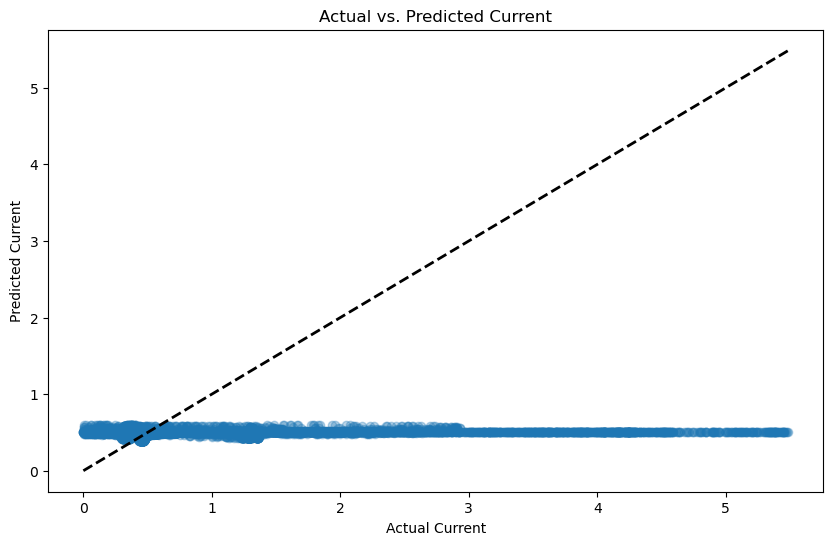

In [24]:
model = LinearRegression()
fit_predict(model, X_train, X_test, y_train, y_test)

## 4. XGBoost Regressor

Mean Absolute Error: 0.0619689891953815
Mean Squared Error: 0.03670308372573219
R-squared Score: 0.45592481740636215


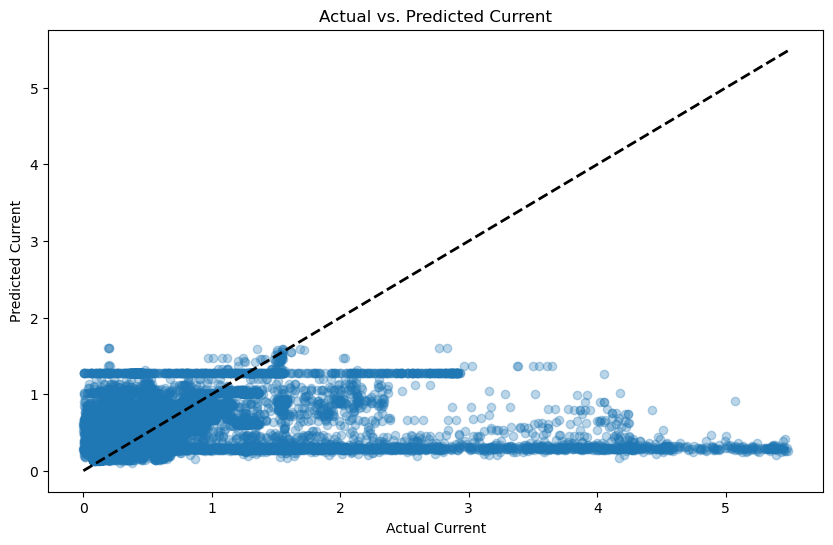

In [25]:
model = XGBRegressor()  
fit_predict(model, X_train, X_test, y_train, y_test)

## 5. RandomForest

Mean Absolute Error: 0.05865972742214217
Mean Squared Error: 0.034461603011874384
R-squared Score: 0.48915183554427677


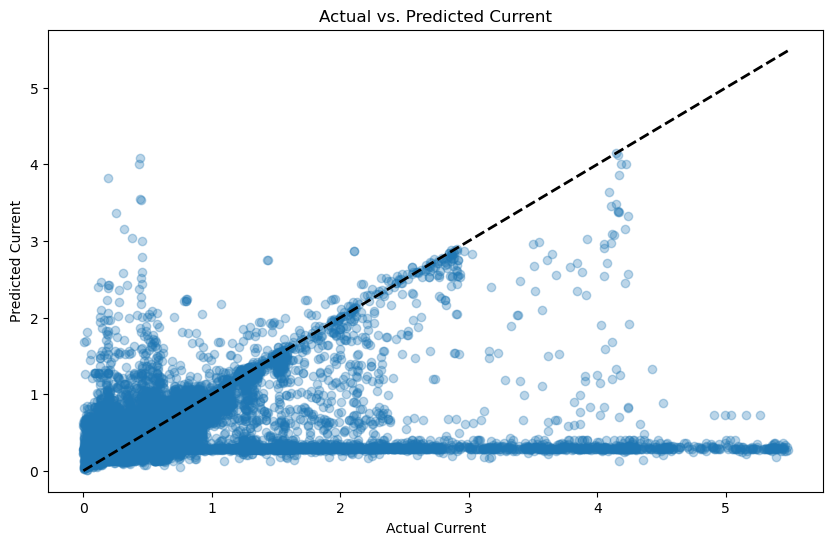

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
fit_predict(model, X_train, X_test, y_train, y_test)

## 6. SVM

In [7]:
model = SVR(kernel='rbf')  
fit_predict(model, X_train_scaled, X_test_scaled, y_train, y_test)

## 7. Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# PyCaret

The best regression model can be found out by using the pycaret library.

In [7]:
from pycaret.regression import *

df_X = df[['Speed_X', 'Accel_X', 'Current_X']]
reg_setup = setup(df_X, target='Current_X')
best = compare_models()
y_pred = best.predict(X_test)

,Description,Value
0,Session id,5142
1,Target,Current_X
2,Target type,Regression
3,Original data shape,"(1795901, 3)"
4,Transformed data shape,"(1795901, 3)"
5,Transformed train set shape,"(1257130, 3)"
6,Transformed test set shape,"(538771, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0612,0.0359,0.1895,0.4677,0.0877,9.6785,50.1090
lightgbm,Light Gradient Boosting Machine,0.0617,0.0364,0.1906,0.4611,0.0882,9.5906,1.7600
gbr,Gradient Boosting Regressor,0.0643,0.0366,0.1912,0.4576,0.0893,9.6332,24.8910
xgboost,Extreme Gradient Boosting,0.0619,0.0366,0.1913,0.4572,0.0887,9.6048,2.4330
dt,Decision Tree Regressor,0.0617,0.0374,0.1932,0.4461,0.0901,9.5584,1.6800
ada,AdaBoost Regressor,0.0683,0.0385,0.1963,0.4288,0.0924,9.5581,3.7370
knn,K Neighbors Regressor,0.0763,0.0419,0.2047,0.3786,0.1007,8.7282,8.3800
lar,Least Angle Regression,0.1847,0.0674,0.2596,0.0003,0.1515,16.9001,0.0780
br,Bayesian Ridge,0.1847,0.0674,0.2596,0.0003,0.1515,16.9001,0.0900
ridge,Ridge Regression,0.1847,0.0674,0.2596,0.0003,0.1515,16.9001,0.0780


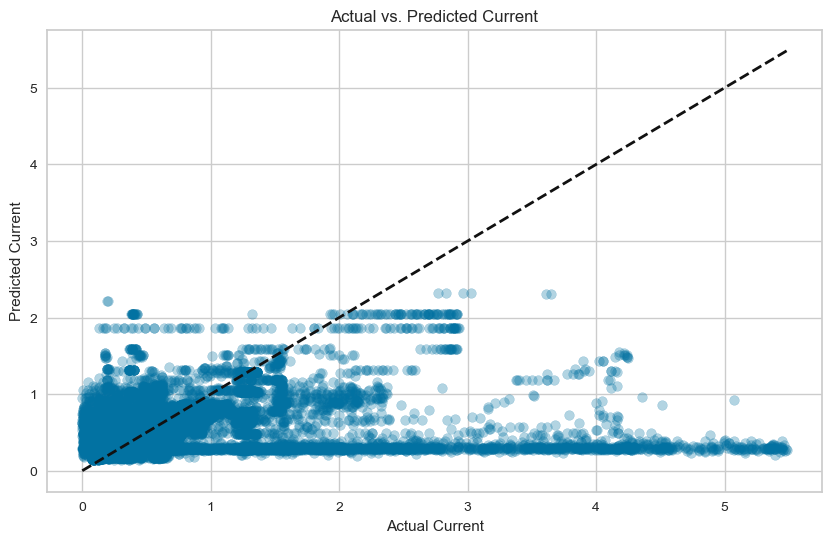

In [10]:
plot_prediction(y_test, y_pred)

# Identifying Repetition

### 1. AutoCorrelation Analysis

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
columns = ['Speed_X', 'Accel_X', 'Current_X']

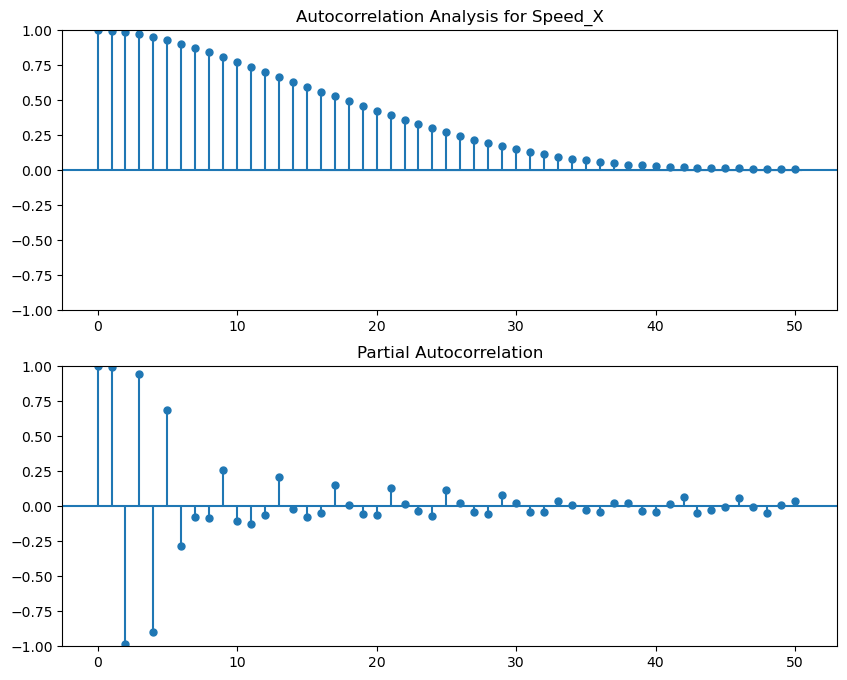

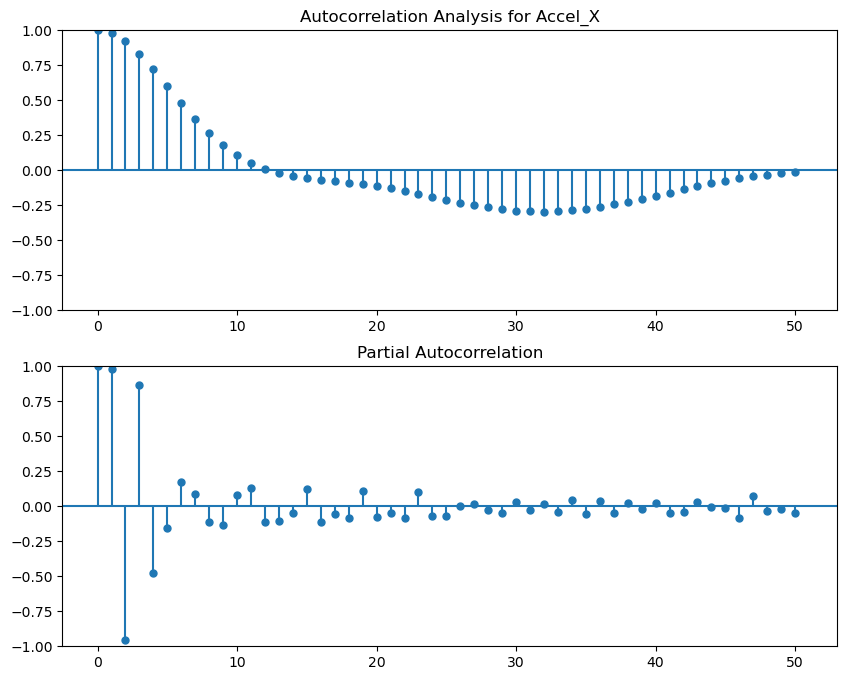

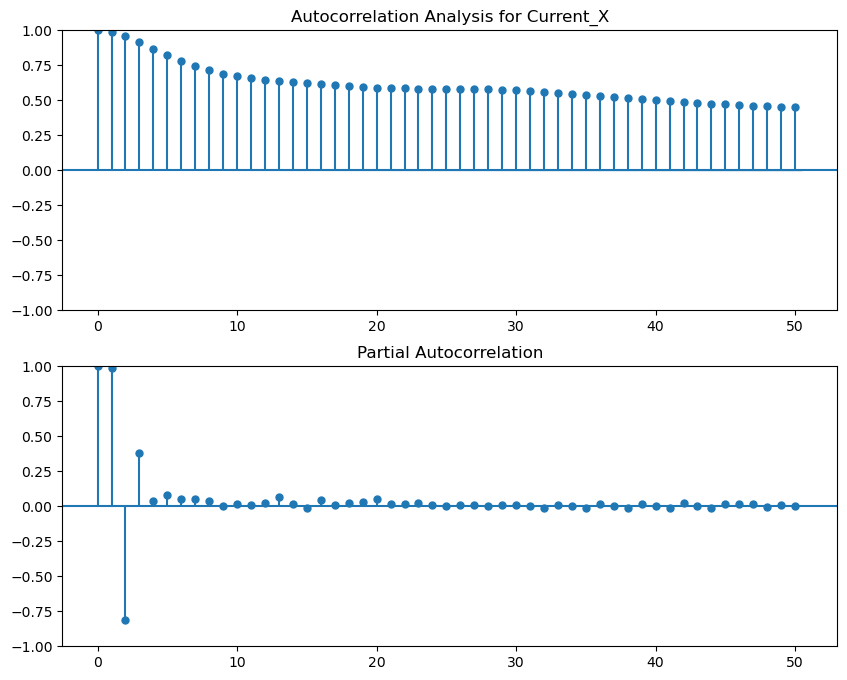

In [6]:
for c in columns:
    data = df[c]
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(data, lags=50, ax=ax[0])
    plot_pacf(data, lags=50, ax=ax[1])
    ax[0].set_title(f'Autocorrelation Analysis for {c}')
    plt.show()

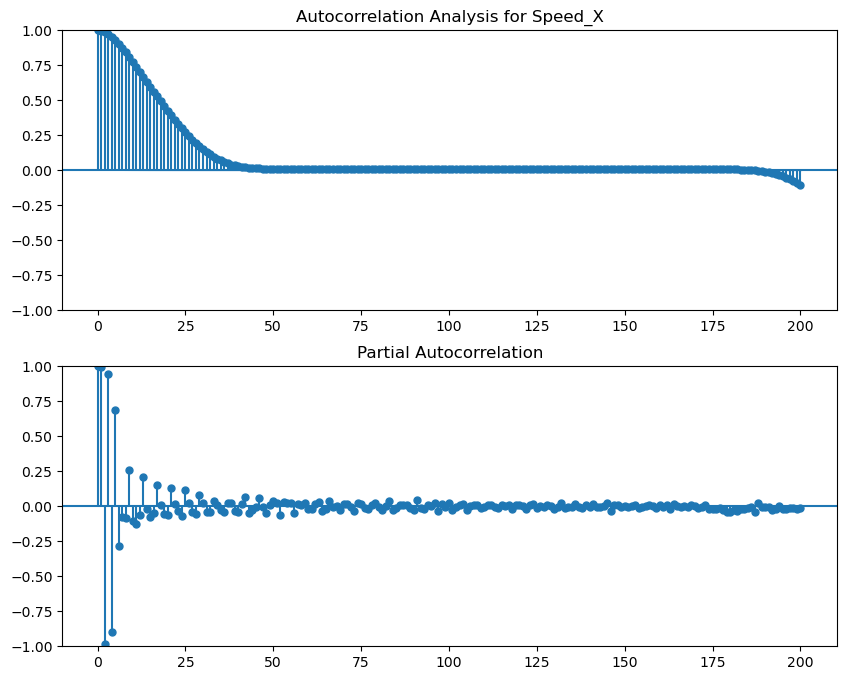

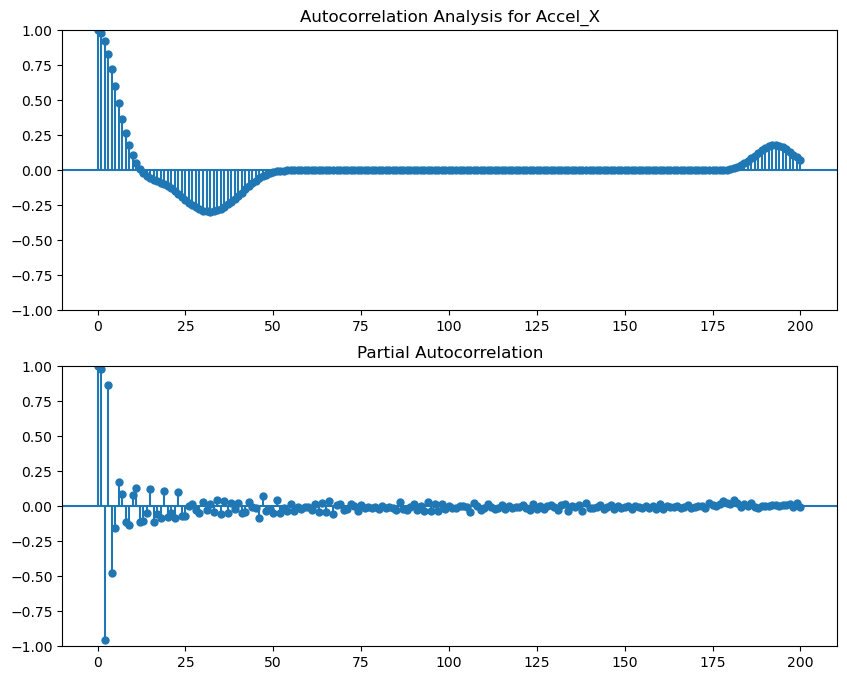

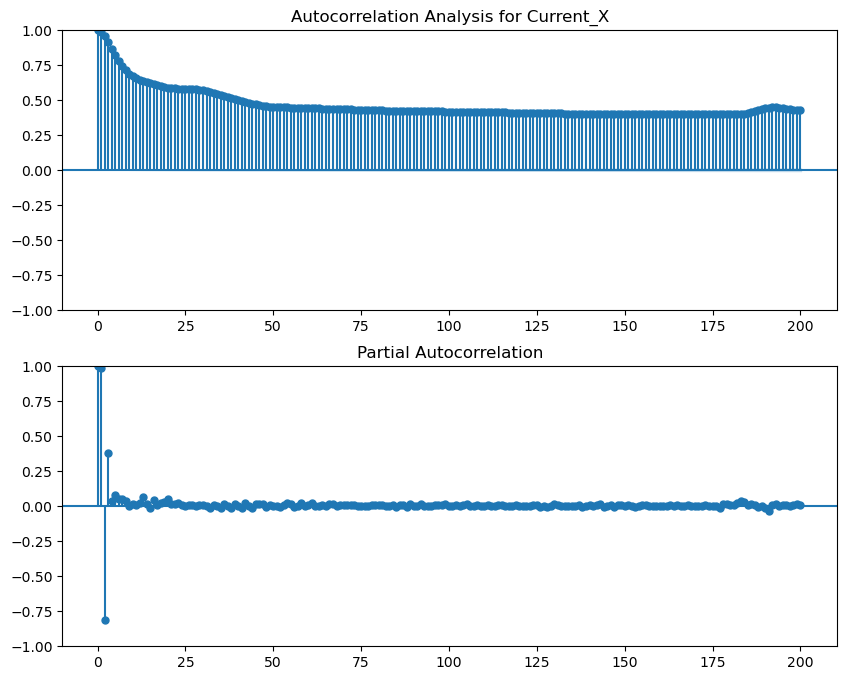

In [29]:
for c in columns:
    data = df[c]
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(data, lags=200, ax=ax[0])
    plot_pacf(data, lags=200, ax=ax[1])
    ax[0].set_title(f'Autocorrelation Analysis for {c}')
    plt.show()

### 2. Matrix Profiling

https://towardsdatascience.com/how-to-painlessly-analyze-your-time-series-f52dab7ea80d

https://github.com/matrix-profile-foundation/matrixprofile

In [20]:
import matrixprofile as mp

ModuleNotFoundError: No module named 'matrixprofile'